ML Final
====                            
106061121 莊裕嵐 106061140 許暐彤

## Implementation 2：開花長短

In [1]:
import sys

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
col_names = ['SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'PRO']

import the dataset

In [4]:
pima_temp = pd.read_csv(r'D:\NTHU_Assignments\Senior_20\Machine_learning\final_project\datasets\hrk_temp_feedin.csv', header=None, names = col_names)
pima_rain = pd.read_csv(r'D:\NTHU_Assignments\Senior_20\Machine_learning\final_project\datasets\hrk_rain_feedin.csv', header=None, names = col_names)
pima_humid = pd.read_csv(r'D:\NTHU_Assignments\Senior_20\Machine_learning\final_project\datasets\hrk_humid_feedin.csv', header=None, names = col_names)
pima_sun = pd.read_csv(r'D:\NTHU_Assignments\Senior_20\Machine_learning\final_project\datasets\hrk_sun_feedin.csv', header=None, names = col_names)

In [5]:
pima_sun

#random checking

,SEP,OCT,NOV,DEC,JAN,FEB,MAR,APR,PRO
0,124.1,141.0,142.9,190.8,174.7,131.2,162.9,226.7,M
1,136.5,153.3,124.0,181.0,221.9,118.3,139.8,139.9,S
2,165.3,81.4,158.9,194.9,243.9,148.9,214.8,204.0,L
3,165.8,141.3,143.4,187.6,183.0,148.6,149.7,162.4,M
4,164.4,156.6,153.3,166.9,212.5,173.7,190.1,196.0,L
5,164.2,110.4,177.4,181.8,204.1,139.8,205.0,218.3,M
6,145.8,135.2,134.6,185.2,182.0,166.9,194.2,149.5,M
7,113.3,181.3,120.1,162.0,201.5,160.1,161.9,149.2,L
8,79.4,119.6,132.1,193.7,226.7,193.7,190.3,198.8,L
9,124.4,94.7,162.7,211.1,206.1,167.3,198.0,201.8,S


In [6]:
X_temp = pima_temp.drop(['PRO'], axis=1)
X_rain = pima_rain.drop(['PRO'], axis=1)
X_humid = pima_humid.drop(['PRO'], axis=1)
X_sun = pima_sun.drop(['PRO'], axis=1)

Data Preprocessing

In [8]:
y = np.array([15, 13, 23, 15, 22, 15, 15, 21, 25, 14, 18, 20])

Hand-typing the y-value of the regression model.

Seperation of training and testing data

Training data time range : 2009~2018

In [9]:
X_temp_train = np.array(X_temp[:10])
X_rain_train = np.array(X_rain[:10])
X_humid_train = np.array(X_humid[:10])
X_sun_train = np.array(X_sun[:10])

Tesing data time range : 2019~2020

In [10]:
X_temp_test = np.array(X_temp[10:])
X_rain_test = np.array(X_rain[10:])
X_humid_test = np.array(X_humid[10:])
X_sun_test = np.array(X_sun[10:])

In [11]:
y_train, y_test = y[:10], y[10:]

In [12]:
y_test

array([18, 20])

Model building

In [13]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor

Reasons to model selecting 

1. Bayesian Ridge Model

Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand. 

The advantages of Bayesian Regression are:

It adapts to the data at hand.

It can be used to include regularization parameters in the estimation procedure.

The disadvantages of Bayesian regression include:

Inference of the model can be time consuming.

2. Multiple layer perceptron regressor 

MLPRegressor trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

This implementation works with data represented as dense and sparse numpy arrays of floating point values.

3. Linear regression : General regression method.

4. Random forest regressor : Qualitative approach analysis

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

In [44]:
reg1 = LinearRegression()
reg2 = BayesianRidge()
reg3 = MLPRegressor(hidden_layer_sizes=8, learning_rate='adaptive')
reg4 = RandomForestRegressor()

Setting up the element regressor for sub-regressor in the model.

In [45]:
from sklearn.base import clone

Importing the clone packag to deplicate the sub-regressot of the model.

In [46]:
sub_reg = StackingRegressor([('lr', reg1), ('bay', reg2), ('dnn', reg3), ('rfr', reg4)])

The sub-regressor consists of four types of regressors including linear regression, BaysianRidge, MLP and Random Forest.

In [47]:
REG_temp = clone(sub_reg)  #temperture regressor

In [48]:
REG_temp.fit(X_temp_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('bay', BayesianRidge()),
                              ('dnn',
                               MLPRegressor(hidden_layer_sizes=8,
                                            learning_rate='adaptive')),
                              ('rfr', RandomForestRegressor())])

In [49]:
REG_temp.predict(X_temp_test)

array([20.33856468, 16.8965183 ])

The block shows the predicted data of the temperature regressor.

In [50]:
REG_rain = clone(sub_reg) #rainfall regressor

In [51]:
REG_rain.fit(X_rain_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('bay', BayesianRidge()),
                              ('dnn',
                               MLPRegressor(hidden_layer_sizes=8,
                                            learning_rate='adaptive')),
                              ('rfr', RandomForestRegressor())])

In [52]:
REG_rain.predict(X_rain_test)

array([24.57054616, 19.48843516])

The block shows the predicted data of the rainfall regressor.

In [53]:
REG_humid = clone(sub_reg) #humidity regressor
REG_sun = clone(sub_reg) #sunshine regressor

In [54]:
REG_humid.fit(X_humid_train, y_train)
REG_sun.fit(X_sun_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('bay', BayesianRidge()),
                              ('dnn',
                               MLPRegressor(hidden_layer_sizes=8,
                                            learning_rate='adaptive')),
                              ('rfr', RandomForestRegressor())])

In [55]:
print(REG_humid.predict(X_humid_test))
print(REG_sun.predict(X_sun_test))

[24.11955128 19.06024663]
[16.85416704 11.83314188]


Define a function in order to combine the data. Thus, take the combination data into the final regression model.

In [56]:
def Transfer_Vector_Generator(cstemp, csrain, cshumid, cssun, datatemp, datarain, datahumid, datasun) :
    data_temp_trans = cstemp.predict(datatemp)
    data_rain_trans = csrain.predict(datarain)
    data_humid_trans = cshumid.predict(datahumid)
    data_sun_trans = cssun.predict(datasun)

    transfer_vector = np.column_stack((data_temp_trans, data_rain_trans, data_humid_trans, data_sun_trans))

    return transfer_vector

In [57]:
X_train_transfer = Transfer_Vector_Generator(REG_temp, REG_rain, REG_humid, REG_sun, X_temp_train, X_rain_train, X_humid_train, X_sun_train)

Showing the transfer vector of the testing data 

In [58]:
X_train_transfer

array([[18.2271607 , 17.75386826, 18.89515727, 18.21894305],
       [18.24649859, 17.892185  , 19.34785162, 19.73336966],
       [17.88657582, 24.13923802, 16.20847117, 11.01660302],
       [18.43958286, 17.29617267, 18.37356883, 17.91987773],
       [17.89830166, 23.71136281, 18.65604808, 14.7894699 ],
       [18.54115446, 20.14624146, 19.58198068, 16.80164031],
       [18.49730304, 19.60977915, 20.44964803, 17.92814105],
       [17.57932231, 21.06666171, 20.49628979, 16.88705358],
       [17.38283918, 24.71690067, 19.90692641, 12.36524384],
       [18.26951837, 19.30123503, 23.1565795 , 17.50310089]])

In [143]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNetCV

Choosing the GradientBoostingRegressor as the final regressor.

In [153]:
REG_final = GradientBoostingRegressor()

In [154]:
REG_final.fit(X_train_transfer, y_train)

GradientBoostingRegressor()

In [155]:
X_test_transfer = Transfer_Vector_Generator(REG_temp, REG_rain, REG_humid, REG_sun, X_temp_test, X_rain_test, X_humid_test, X_sun_test)
X_test_transfer

array([[20.33856468, 24.57054616, 24.11955128, 16.85416704],
       [16.8965183 , 19.48843516, 19.06024663, 11.83314188]])

The transfer vector of the testing data shows at the block above.

In [156]:
REG_final.predict(X_test_transfer)

array([17.86412882, 19.93346431])

The regression result shows respectively. 

2019: 17.86 days 2020: 19.93 days

Extracting the importance of features from the main regressor

In [158]:
REG_final.feature_importances_


array([0.49245573, 0.46986733, 0.00791835, 0.02975859])

Plottin the bar diagram to display then importance of each features.

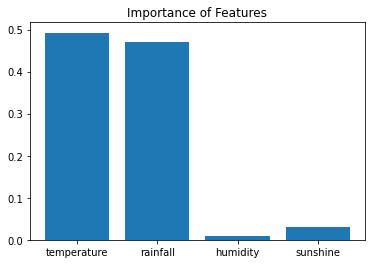

In [157]:
index = list(['temperature', 'rainfall', 'humidity', 'sunshine'])
plt.title("Importance of Features")
plt.bar(index, REG_final.feature_importances_)
plt.show()

From the plot shows, the temperature and the rainfall take the majority.

Conclusion and discussion is placed at the video uploaded.